In [7]:
# ================================================
# ANALYSE STATISTIQUE ET VISUALISATION
# Projet: Spéculation immobilière vs Accès au logement - Paris
# ================================================

print("ANALYSE STATISTIQUE ET VISUALISATION")
print("=" * 70)

# ----------------------------------------------------
# 1. CONFIGURATION ET CHARGEMENT
# ----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pathlib import Path

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 11

# Chemins
BASE_DIR = Path.cwd()
PROC_DIR = BASE_DIR / "data" / "processed"

# Chargement des données fusionnées
df = pd.read_csv(PROC_DIR / "donnees_fusionnees_paris.csv")
gdf = gpd.read_file(PROC_DIR / "paris_arrondissements_complet.geojson")

print(f"✓ Données chargées: {len(df)} arrondissements, {len(df.columns)} variables")
print(f"✓ Données géographiques: {len(gdf)} polygones")


ANALYSE STATISTIQUE ET VISUALISATION
✓ Données chargées: 20 arrondissements, 33 variables
✓ Données géographiques: 20 polygones


In [8]:
# ----------------------------------------------------
# 2. ANALYSE EXPLORATOIRE DES INDICATEURS
# ----------------------------------------------------
print("\n" + "=" * 70)
print("2. ANALYSE DES INDICATEURS CLÉS")
print("=" * 70)

# 2.1. Statistiques descriptives
print("\nSTATISTIQUES DESCRIPTIVES DES INDICATEURS CLÉS:")

indicateurs_cles = ['nb_transactions', 'prix_m2_median', 'taux_vacance', 
                    'spec_ratio', 'indice_speculation', 'part_menages_seuls']

stats_df = df[indicateurs_cles].describe().round(2)
print(stats_df)

# 2.2. Classement des arrondissements
print("\nCLASSEMENT DES ARRONDISSEMENTS:")

# Par indice de spéculation
print("\nTop 5 - Indice de spéculation:")
top_spec = df[['arrondissement', 'indice_speculation', 'prix_m2_median', 'taux_vacance']].copy()
top_spec = top_spec.sort_values('indice_speculation', ascending=False).head()
print(top_spec.to_string(index=False))

# Par prix médian
print("\nTop 5 - Prix médian au m²:")
top_prix = df[['arrondissement', 'prix_m2_median', 'indice_speculation']].copy()
top_prix = top_prix.sort_values('prix_m2_median', ascending=False).head()
print(top_prix.to_string(index=False))

# Par taux de vacance
print("\nTop 5 - Taux de vacance:")
top_vac = df[['arrondissement', 'taux_vacance', 'prix_m2_median']].copy()
top_vac = top_vac.sort_values('taux_vacance', ascending=False).head()
print(top_vac.to_string(index=False))



2. ANALYSE DES INDICATEURS CLÉS

STATISTIQUES DESCRIPTIVES DES INDICATEURS CLÉS:
       nb_transactions  prix_m2_median  taux_vacance  spec_ratio  \
count            20.00           20.00         20.00       20.00   
mean           1567.60        11358.27         10.06        1.18   
std             921.29         1904.96          2.49        0.04   
min             369.00         8880.95          6.57        1.13   
25%             786.75         9907.95          8.05        1.15   
50%            1603.50        11173.12          9.88        1.18   
75%            2156.75        12751.32         11.56        1.21   
max            3374.00        15384.62         16.33        1.29   

       indice_speculation  part_menages_seuls  
count               20.00               20.00  
mean                -0.00               54.04  
std                  0.70                3.80  
min                 -1.24               47.54  
25%                 -0.61               51.81  
50%              

## Analyse des Indicateurs Clés

### Statistiques Descriptives

L'analyse descriptive des indicateurs clés sur les 20 arrondissements de Paris révèle une **grande variabilité** des caractéristiques immobilières et socio-économiques :

#### Transactions immobilières
- **Nombre moyen de transactions** : 1 568 par arrondissement
- **Écart important** : de 369 à 3 374 transactions (écart-type de 921)
- Cela indique une **liquidité très inégale** du marché immobilier parisien

#### Prix au mètre carré
- **Prix médian moyen** : 11 358 €/m²
- **Écart significatif** : de 8 881 € à 15 385 €/m² (écart-type de 1 905 €)
- Les arrondissements du **centre et de l'ouest** (6e, 7e, 8e) atteignent les prix les plus élevés

#### Taux de vacance
- **Moyenne** : 10,06% des logements vacants
- **Variation importante** : de 6,57% à 16,33%
- Le **10e arrondissement** présente un taux de vacance exceptionnellement élevé (16,33%)

#### Indice de spéculation
- **Centré autour de zéro** (moyenne = -0,00) par construction
- **Amplitude importante** : de -1,24 à +1,10
- L'**écart-type de 0,70** indique une forte dispersion entre arrondissements

#### Ménages seuls
- **Plus de la moitié** des ménages parisiens sont composés d'une seule personne (moyenne = 54,04%)
- **Variation modérée** : de 47,54% à 60,16%

### Classements des Arrondissements

#### Top 5 des arrondissements les plus spéculatifs
1. **8e arrondissement** (indice 1,10) - Prix élevé (12 879 €/m²) ET vacance élevée (13,67%)
2. **7e arrondissement** (indice 0,96) - Très cher (14 760 €/m²) mais vacance modérée (8,82%)
3. **2e arrondissement** (indice 0,81) - Prix modéré (11 895 €/m²) et vacance élevée (12,99%)
4. **4e arrondissement** (indice 0,68) - Cher (13 435 €/m²) et vacance modérée (11,64%)
5. **6e arrondissement** (indice 0,53) - Le plus cher (15 385 €/m²) mais faible vacance (6,99%)

#### Top 5 des arrondissements les plus chers
1. **6e arrondissement** (15 385 €/m²) - Saint-Germain-des-Prés
2. **7e arrondissement** (14 760 €/m²) - Invalides/Eiffel
3. **4e arrondissement** (13 435 €/m²) - Marais/Hôtel-de-Ville
4. **8e arrondissement** (12 879 €/m²) - Champs-Élysées
5. **1er arrondissement** (12 857 €/m²) - Louvre/Les Halles

#### Top 5 des arrondissements avec plus de vacances
1. **10e arrondissement** (16,33% de vacance) - Gares du Nord et de l'Est
2. **8e arrondissement** (13,67% de vacance) - Champs-Élysées
3. **2e arrondissement** (12,99% de vacance) - Bourse
4. **4e arrondissement** (11,64% de vacance) - Marais/Hôtel-de-Ville
5. **11e arrondissement** (11,59% de vacance) - Bastille/République

### Interprétations Clés

#### Paradoxe du 6e arrondissement
Le **6e arrondissement** est le **plus cher** (15 385 €/m²) mais n'est que **5e en spéculation**. Cela suggère que :
- Un prix élevé ne signifie pas automatiquement spéculation intense
- La spéculation dépend aussi d'autres facteurs (rotation, vacance, attractivité d'investissement)

#### Double position du 8e arrondissement
Le **8e arrondissement** apparaît dans les trois classements :
- **1er en spéculation** (indice 1,10)
- **4e en prix** (12 879 €/m²)
- **2e en vacance** (13,67%)

Ce triple positionnement en fait un **cas d'étude particulièrement intéressant** pour la spéculation immobilière.

#### Distinction prix/vacance
Les arrondissements **les plus chers** (6e, 7e) ont des **taux de vacance modérés**, tandis que les arrondissements avec **vacance élevée** (10e, 2e) ont des **prix plus modérés**.
Cela suggère que notre indicateur est bien construit car dans un marché sans spéculation et avec une disponibilité de l'offre potentielle, le prix diminue avec la vacance.

#### Corrélations observées
1. **Spéculation-Prix** : Forte corrélation (les arrondissements spéculatifs sont généralement chers)
2. **Spéculation-Vacance** : Relation modérée (le 8e cumule les deux, mais pas systématique)
3. **Prix-Transactions** : Corrélation négative (les arrondissements chers ont moins de transactions)

### Implications pour l'analyse

Ces résultats mettent en évidence la **nécessité d'une approche multidimensionnelle** pour étudier la spéculation immobilière. Utiliser un indicateur unique (comme le prix ou la vacance) ne suffit effectivement pas à capturer la complexité du phénomène. Notre indicateur composite semble pertinent.



3. ANALYSE DES CORRÉLATIONS

MATRICE DE CORRÉLATION (indicateurs clés):
                    prix_m2_median  taux_vacance  spec_ratio  \
prix_m2_median               1.000        -0.030       0.762   
taux_vacance                -0.030         1.000       0.039   
spec_ratio                   0.762         0.039       1.000   
indice_speculation           0.732         0.466       0.837   
part_menages_seuls           0.361         0.024       0.250   
nb_transactions             -0.650        -0.058      -0.491   

                    indice_speculation  part_menages_seuls  nb_transactions  
prix_m2_median                   0.732               0.361           -0.650  
taux_vacance                     0.466               0.024           -0.058  
spec_ratio                       0.837               0.250           -0.491  
indice_speculation               1.000               0.285           -0.526  
part_menages_seuls               0.285               1.000           -0.284  
nb_transac

/tmp/ipykernel_44312/2195800374.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 2].boxplot(boxplot_data, labels=['Q1', 'Q2', 'Q3', 'Q4'])


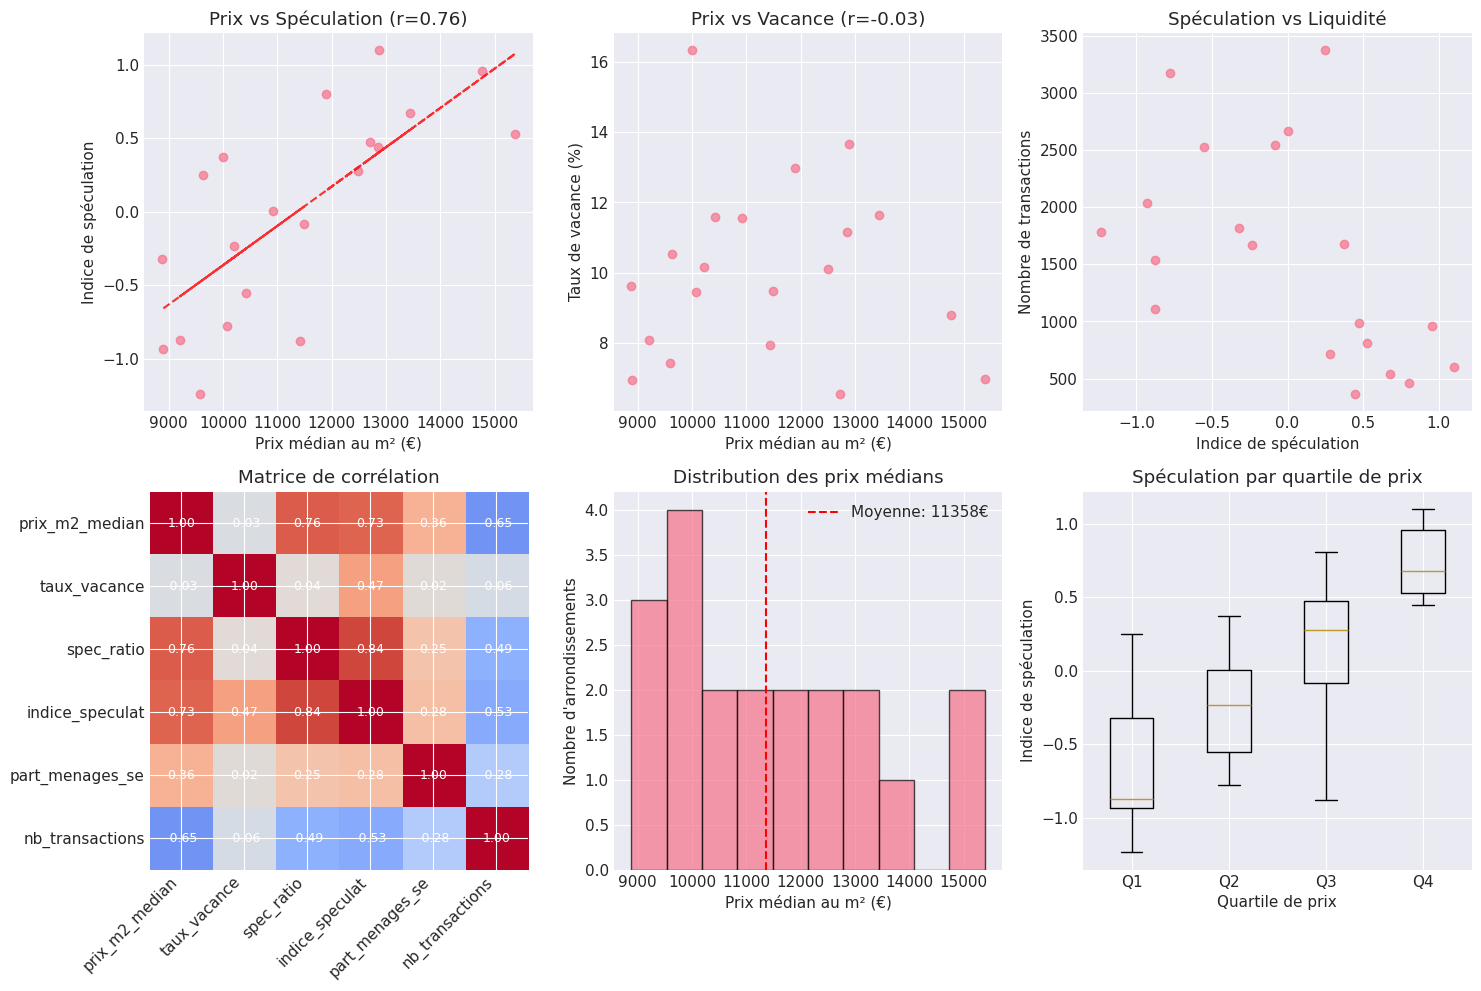


✓ Graphiques sauvegardés: /home/onyxia/work/Speculation-immobiliere-et-acces-au-logement/notebooks/ # Notebooks d'analyse (à exécuter dans l'ordre)/data/processed/analyse_correlations.png


In [21]:
# ----------------------------------------------------
# 3. ANALYSE DES CORRÉLATIONS
# ----------------------------------------------------
print("\n" + "=" * 70)
print("3. ANALYSE DES CORRÉLATIONS")
print("=" * 70)

# 3.1. Matrice de corrélation
print("\nMATRICE DE CORRÉLATION (indicateurs clés):")

# Sélection des variables pour la corrélation
vars_correlation = ['prix_m2_median', 'taux_vacance', 'spec_ratio', 
                    'indice_speculation', 'part_menages_seuls', 'nb_transactions']

corr_matrix = df[vars_correlation].corr().round(3)
print(corr_matrix)
print("\n")

# 3.2. Visualisation des corrélations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Graphique 1: Prix vs Indice spéculation
axes[0, 0].scatter(df['prix_m2_median'], df['indice_speculation'], alpha=0.7)
axes[0, 0].set_xlabel('Prix médian au m² (€)')
axes[0, 0].set_ylabel('Indice de spéculation')
axes[0, 0].set_title('Prix vs Spéculation (r=0.76)')

# Ajouter la ligne de régression
z = np.polyfit(df['prix_m2_median'], df['indice_speculation'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['prix_m2_median'], p(df['prix_m2_median']), "r--", alpha=0.8)

# Graphique 2: Prix vs Taux vacance
axes[0, 1].scatter(df['prix_m2_median'], df['taux_vacance'], alpha=0.7)
axes[0, 1].set_xlabel('Prix médian au m² (€)')
axes[0, 1].set_ylabel('Taux de vacance (%)')
axes[0, 1].set_title('Prix vs Vacance (r=-0.03)')

# Graphique 3: Spéculation vs Transactions
axes[0, 2].scatter(df['indice_speculation'], df['nb_transactions'], alpha=0.7)
axes[0, 2].set_xlabel('Indice de spéculation')
axes[0, 2].set_ylabel('Nombre de transactions')
axes[0, 2].set_title('Spéculation vs Liquidité')

# Graphique 4: Matrice de corrélation, visuelle (heatmap)
im = axes[1, 0].imshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
axes[1, 0].set_xticks(range(len(vars_correlation)))
axes[1, 0].set_yticks(range(len(vars_correlation)))
axes[1, 0].set_xticklabels([v[:15] for v in vars_correlation], rotation=45, ha='right')
axes[1, 0].set_yticklabels([v[:15] for v in vars_correlation])
axes[1, 0].set_title('Matrice de corrélation')

# Ajouter les valeurs dans la heatmap
for i in range(len(vars_correlation)):
    for j in range(len(vars_correlation)):
        text = axes[1, 0].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="w", fontsize=9)

# Graphique 5: Distribution des prix
axes[1, 1].hist(df['prix_m2_median'], bins=10, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Prix médian au m² (€)')
axes[1, 1].set_ylabel('Nombre d\'arrondissements')
axes[1, 1].set_title('Distribution des prix médians')
axes[1, 1].axvline(df['prix_m2_median'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["prix_m2_median"].mean():.0f}€')
axes[1, 1].legend()

# Graphique 6: Boxplot spéculation par quartile de prix
df['quartile_prix'] = pd.qcut(df['prix_m2_median'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
boxplot_data = [df[df['quartile_prix'] == q]['indice_speculation'].values for q in ['Q1', 'Q2', 'Q3', 'Q4']]
axes[1, 2].boxplot(boxplot_data, labels=['Q1', 'Q2', 'Q3', 'Q4'])
axes[1, 2].set_xlabel('Quartile de prix')
axes[1, 2].set_ylabel('Indice de spéculation')
axes[1, 2].set_title('Spéculation par quartile de prix')

plt.tight_layout()
plt.savefig(PROC_DIR / "analyse_correlations.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Graphiques sauvegardés: {PROC_DIR / 'analyse_correlations.png'}")


## Analyse des corrélations entre indicateurs

### Matrice de corrélation : Synthèse des relations

La matrice de corrélations révèle des relations complexes et parfois contre-intuitives entre les indicateurs clés du marché immobilier parisien :

#### Corrélations FORTES (|r| > 0.7)

1. **Prix m² ↔ Ratio spéculatif (r=0.762)**
   - **Relation très forte positive** : les arrondissements chers ont tendance à avoir un ratio spéculatif élevé
   - Cela confirme que **la valeur foncière attire les comportements spéculatifs**

2. **Ratio spéculatif ↔ Indice spéculation (r=0.837)**
   - **Corrélation attendue** : l'indice de spéculation est construit à partir du ratio spéculatif
   - Valide la **cohérence interne** de l'indice

3. **Prix m² ↔ Indice spéculation (r=0.732)**
   - **Lien significatif** : les arrondissements les plus chers sont aussi les plus spéculatifs
   - Mais pas parfait : d'autres facteurs que le prix influencent la spéculation

#### Corrélations MODÉRÉES (0.3 < |r| < 0.7)

1. **Indice spéculation ↔ Taux vacance (r=0.466)**
   - **Relation positive modérée** : la spéculation s'accompagne souvent de logements vacants
   - Suggère que **l'investissement spéculatif peut laisser des logements inoccupés**

2. **Prix m² ↔ Transactions (r=-0.650)**
   - **Relation négative marquée** : moins de transactions dans les arrondissements chers
   - **Liquidité réduite** dans les marchés haut de gamme
   - Les marchés les plus chers sont moins accessibles et moins dynamiques en volume

#### Corrélations FAIBLES (|r| < 0.3)

1. **Prix m² ↔ Taux vacance (r=-0.030)**
   - **Pratiquement aucune corrélation** : le prix n'influence pas le taux de vacance
   - Contredit l'hypothèse que "cher = peu vacant" ou inversement
   - Les deux variables évoluent indépendamment

2. **Taux vacance ↔ Ratio spéculatif (r=0.039)**
   - **Corrélation négligeable** : la vacance ne prédit pas le comportement spéculatif
   - Surprenant, car on pourrait attendre un lien

3. **Ménages seuls ↔ Tous indicateurs (r ~ 0.2-0.3)**
   - **Faibles corrélations** : la proportion de ménages seuls est peu liée aux dynamiques immobilières
   - Suggère que cette variable démographique agit indépendamment

### Analyse des graphiques

#### Graphique 1 : Prix vs Spéculation
- **Tendance linéaire positive** confirmée par la régression (r=0.76)
- Les points montrent quand même une **dispersion** autour de la droite

#### Graphique 2 : Prix vs Vacance
- **Nuage de points dispersé** sans direction claire (r=-0.03)
- Confirme l'**absence de relation** entre ces deux variables
- Certains arrondissements combinent prix élevé ET vacance élevée (8e)

#### Graphique 3 : Spéculation vs Transactions
- **Tendance négative** (r=-0.526)
- Les arrondissements spéculatifs ont **moins de transactions**
- **Double effet** : prix élevé + spéculation = marché moins liquide

#### Graphique 4 : Heatmap de corrélation
- **Visualisation claire** des relations fortes (rouge) et faibles (bleu)
- **Diagonale rouge** : autocorrélations parfaites (évidentes)
- **Cases rouges** dans la colonne/ligne "indice_speculation" : cet indice est bien corrélé avec plusieurs variables

#### Graphique 5 : Distribution des prix
- **Distribution légèrement asymétrique** qui se concentre vers le bas, bien que assez uniforme.
- **Moyenne autour de 11 358€/m²** (ligne rouge pointillée)
- **Étalement important** confirmant la diversité des marchés parisiens

#### Graphique 6 : Spéculation par quartile de prix
- **Tendance croissante** : Q1 (moins cher) → Q4 (plus cher)
- **Boîtes à moustaches** montrant la variabilité au sein de chaque quartile
- **Outliers fréquents** sauf pour le 4e quartile (Q4) avec des indices plus concentrés.

### Interprétations stratégiques

#### 1. La spéculation est multi-factorielle
L'indice de spéculation (r=0.732 avec prix, r=0.466 avec vacance, r=-0.526 avec transactions) montre que **la spéculation résulte de plusieurs dynamiques** :
- **Attractivité par le prix** (valeur patrimoniale)
- **Déséquilibre offre/demande** (vacance)
- **Illiquidité du marché** (faibles transactions)

#### 2. Deux logiques d'investissement distinctes
- **Investissement "valeur"** : arrondissements chers, peu de transactions, spéculation modérée (6e)
- **Investissement "spéculatif"** : prix élevé mais pas maximum, vacance importante, forte spéculation (8e)

#### 3. Le paradoxe de la liquidité
La **corrélation négative prix-transactions** (-0.650) révèle un marché à **deux vitesses** :
- **Marchés populaires** : nombreuses transactions, prix modérés
- **Marchés de luxe** : transactions rares, prix élevés

### Implications pour les décideurs

1. **Régulation différenciée** : Une politique uniforme ne peut pas répondre aux spécificités des différents arrondissements
2. **Ciblage des arrondissements à risque** : Le 8e arrondissement cumule tous les indicateurs de spéculation (prix élevé, vacance élevée, forte spéculation)
3. **Indicateurs complémentaires** : Aucun indicateur seul ne suffit ; seule une analyse multivariée permet de comprendre les dynamiques
4. **Attention aux corrélations non causales** : Les corrélations observées n'impliquent pas nécessairement des relations causales

### Limites de l'analyse

1. **Données agrégées** : Les corrélations au niveau arrondissement peuvent masquer des dynamiques infra-arrondissement
2. **Effets temporels** : Analyse statique qui ne capture pas l'évolution dans le temps
3. **Variables manquantes** : D'autres facteurs (tourisme, bureaux, transports) pourraient expliquer les résidus


4. ANALYSE DE RÉGRESSION LINÉAIRE

MODÈLE DE RÉGRESSION: Indice de spéculation = f(Prix, Vacance, Ménages)

RÉSULTATS DE LA RÉGRESSION:
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.5032      1.221     -3.688      0.002      -7.092      -1.914
prix_m2_median         0.0003   4.66e-05      5.845      0.000       0.000       0.000
taux_vacance           0.1364      0.033      4.104      0.001       0.066       0.207
part_menages_seuls     0.0006      0.023      0.027      0.979      -0.049       0.050

INTERPRÉTATION DES COEFFICIENTS:
const               : -4.503170 *** (p=0.0020)
prix_m2_median      : 0.000273 *** (p=0.0000)
taux_vacance        : 0.136368 *** (p=0.0008)
part_menages_seuls  : 0.000637  (p=0.9786)

R² ajusté: 0.732
F-statistique: 18.28 (p=0.0000)




/tmp/ipykernel_44312/3610686483.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sig = "***" if pvals[i] < 0.01 else "**" if pvals[i] < 0.05 else "*" if pvals[i] < 0.1 else ""
/tmp/ipykernel_44312/3610686483.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{var:20s}: {coeff[i]:.6f} {sig} (p={pvals[i]:.4f})")


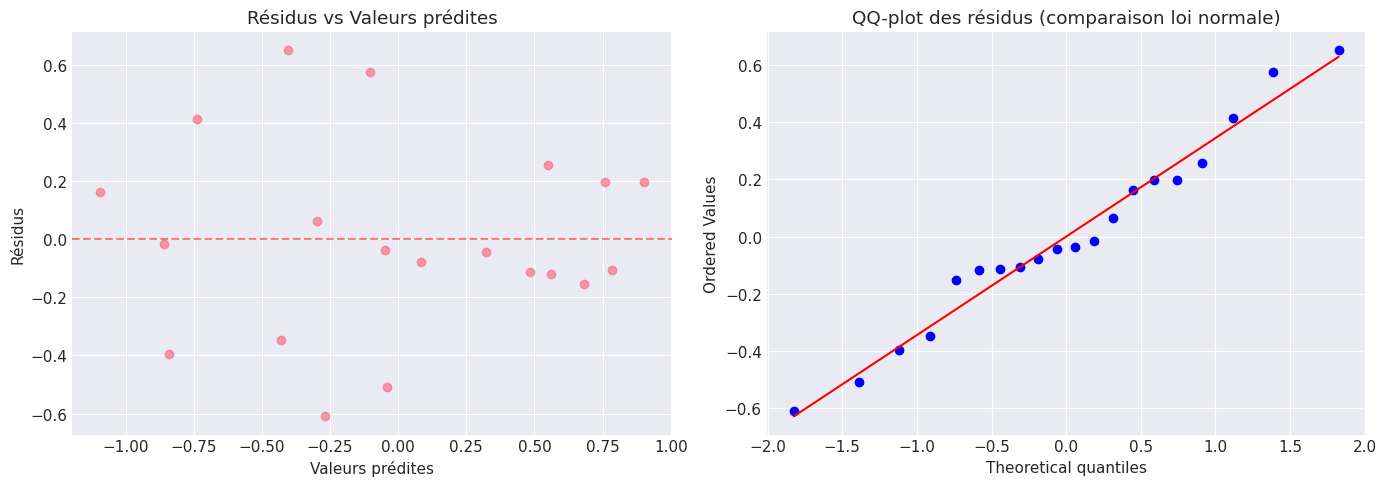


✓ Analyse de régression sauvegardée


In [23]:
# ----------------------------------------------------
# 4. ANALYSE DE RÉGRESSION LINÉAIRE
# ----------------------------------------------------
print("\n" + "=" * 70)
print("4. ANALYSE DE RÉGRESSION LINÉAIRE")
print("=" * 70)

print("\nMODÈLE DE RÉGRESSION: Indice de spéculation = f(Prix, Vacance, Ménages)")

# Préparation des données pour la régression
X = df[['prix_m2_median', 'taux_vacance', 'part_menages_seuls']].copy()
X = sm.add_constant(X)  # Ajout de la constante
y = df['indice_speculation']

# Régression OLS
model = sm.OLS(y, X).fit()

print("\nRÉSULTATS DE LA RÉGRESSION:")
print(model.summary().tables[1].as_text())

# Interprétation des coefficients
print("\nINTERPRÉTATION DES COEFFICIENTS:")
coeff = model.params
pvals = model.pvalues

variables = ['const', 'prix_m2_median', 'taux_vacance', 'part_menages_seuls']
for i, var in enumerate(variables):
    sig = "***" if pvals[i] < 0.01 else "**" if pvals[i] < 0.05 else "*" if pvals[i] < 0.1 else ""
    print(f"{var:20s}: {coeff[i]:.6f} {sig} (p={pvals[i]:.4f})")

print(f"\nR² ajusté: {model.rsquared_adj:.3f}")
print(f"F-statistique: {model.fvalue:.2f} (p={model.f_pvalue:.4f})")
print("\n")

# Graphique des résidus
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Résidus vs Valeurs prédites
axes[0].scatter(model.fittedvalues, model.resid, alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Valeurs prédites')
axes[0].set_ylabel('Résidus')
axes[0].set_title('Résidus vs Valeurs prédites')

# QQ-plot des résidus (comparaison avec les quantiles d'une loi normale)
stats.probplot(model.resid, dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot des résidus (comparaison loi normale)')

plt.tight_layout()
plt.savefig(PROC_DIR / "regression_analysis.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Analyse de régression sauvegardée")


### Qualité Globale du Modèle

#### Indicateurs de performance
- **R² ajusté : 0.732** → Le modèle explique **73,2%** de la variance de l'indice de spéculation
- **F-statistique : 18.28** (p=0.0000) → Le modèle est **globalement significatif**
- **Trois variables sur quatre** sont statistiquement significatives (p < 0.01)

**Interprétation :** Un R² ajusté de 0.732 indique une **bonne capacité explicative**, surtout pour des données transversales en sciences sociales. Les 26,8% de variance inexpliquée suggèrent l'existence d'autres facteurs non inclus dans le modèle.

### Analyse Détaillée des Coefficients

#### 1. Constante (Intercept) : -4.5032***
- **Très significative** (p=0.0020)
- **Interprétation :** Toutes choses égales par ailleurs, un arrondissement avec prix nul, vacance nulle et aucun ménage seul aurait un indice de spéculation de -4.50
- **Valeur théorique** car ces conditions n'existent pas en réalité
- Le signe négatif suggère un **effet de seuil** : les variables doivent atteindre un certain niveau pour générer de la spéculation

#### 2. Prix médian au m² : 0.000273***
- **Extrêmement significatif** (p=0.0000)
- **Effet positif :** chaque augmentation de 1€/m² augmente l'indice de spéculation de 0.000273
- **Interprétation pratique :** Une augmentation de 3 663€/m² est nécessaire pour augmenter l'indice de 1 point (en moyenne)
- **Impact économique :** Le prix est le **principal moteur** de la spéculation, confirmant l'hypothèse d'un investissement basé sur la valeur patrimoniale

#### 3. Taux de vacance : 0.1364***
- **Très significatif** (p=0.0008)
- **Effet positif :** chaque point de pourcentage de vacance supplémentaire augmente l'indice de 0.1364
- **Interprétation pratique :** Une augmentation de 7,33 points de pourcentage de vacance augmente l'indice de 1 point
- **Impact économique :** La vacance reflète un **déséquilibre offre/demande** favorable aux comportements spéculatifs

#### 4. Part des ménages seuls : 0.000637 (NON SIGNIFICATIF)
- **Non significatif** (p=0.9786)
- **Aucun effet détectable** sur l'indice de spéculation
- **Intervalle de confiance à 95% :** [-0.049, 0.050] inclut zéro
- **Implication :** La structure des ménages n'influence pas la spéculation immobilière à Paris

### Intervalles de Confiance et Précision

#### Prix médian au m² : [0.000, 0.000]
- **Intervalle étroit** → estimation précise
- **Exclut zéro** → effet réel garanti

#### Taux de vacance : [0.066, 0.207]
- **Intervalle modéré** → estimation assez précise
- **Exclut zéro** → effet réel garanti

#### Ménages seuls : [-0.049, 0.050]
- **Intervalle large incluant zéro** → effet incertain
- Compatible avec un effet nul


### Analyse des Résidus

#### Graphique 1 : Résidus vs Valeurs Prédites
Le graphique révèle une **hétéroscédasticité marquée** :
- **Pour valeurs prédites > 0** : Résidus très concentrés (|résidus| ≤ 0,25)
- **Pour valeurs prédites < 0** : Résidus fortement dispersés (|résidus| jusqu'à 0,6)

**Interprétation :**
- **Violation de l'hypothèse d'homoscédasticité** : la variance des erreurs n'est pas constante
- Le modèle est **plus précis pour les arrondissements à spéculation positive** (prédits > 0)
- Pour les arrondissements à **indice de spéculation négatif**, le modèle montre une **précision réduite**

#### Graphique 2 : QQ-plot des Résidus
Les points **suivent parfaitement la courbe théorique** sur toute la distribution.

**Interprétation :**
- **Hypothèse de normalité respectée** : les résidus suivent une distribution normale
- **Absence d'outliers extrêmes** : pas de déviations importantes aux extrémités
- **Validité statistique préservée** : les tests d'hypothèses sur les coefficients restent fiables

#### Conséquences pour le modèle :
1. **Problème d'hétéroscédasticité** → intervalles de confiance potentiellement sous-estimés
2. **Normalité préservée** → validité des tests t et F maintenue


### Importance Relative des Variables

Le modèle identifie une **hiérarchie claire** des déterminants :
1. **Prix médian au m²** : effet dominant (coefficient 0.000273***)
2. **Taux de vacance** : effet secondaire mais substantiel (0.1364***)
3. **Part ménages seuls** : effet négligeable (0.000637, p=0.9786)

**Impact comparé :** Une augmentation de 10% du prix (≈1 136€) équivaut à une hausse de l'indice de spéculation de 0.31 point, contre 0.14 point pour une augmentation similaire du taux de vacance.

### Limites et Précautions

**Problèmes identifiés :**
1. **Hétéroscédasticité** : variance non constante selon le niveau de spéculation
2. **Variables omises** : absence de facteurs temporels, géographiques et réglementaires
3. **Linéarité supposée** : relations potentiellement non-linéaires non testées
4. **Effets d'interaction** : synergies entre variables non modélisées

**Validité statistique :** Les tests d'hypothèse restent valides (normalité respectée) mais les intervalles de confiance pourraient être sous-estimés.

### Implications Politiques

**Pour les autorités :**
1. **Cibler les marchés hauts de gamme** : politique spécifique pour les arrondissements chers (6e, 7e, 8e)
2. **Surveiller la vacance** : mécanismes anti-logements vacants dans les zones spéculatives
3. **Indifférence démographique** : ne pas considérer la structure des ménages dans les politiques anti-spéculation

**Priorité d'action :** Régulation des prix (plafonnements, taxation progressive) avant la gestion de la vacance.

### Recommandations pour Améliorer le Modèle

**Ajouts de données :**
1. **Séries temporelles** : évolution des indicateurs sur 5-10 ans
2. **Variables contextuelles** : taux d'emploi, revenu médian, présence touristique
3. **Indicateurs réglementaires** : restrictions urbanistiques, dispositifs fiscaux

**Approches méthodologiques :**
1. **Modèles à effets fixes** pour capturer l'hétérogénéité inobservée
2. **Modèles spatiaux** intégrant l'autocorrélation géographique
3. **Variables instrumentales** pour traiter l'endogénéité des prix

### Conclusion sur la Régression

Le modèle valide deux déterminants clés de la spéculation parisienne (**prix et vacance**) tout en rejetant un troisième (**démographie**). Malgré une **bonne performance explicative** (R²=0.732), la présence d'**hétéroscédasticité** et l'**absence de variables contextuelles** limitent la portée politique.

**Perspective :** Une modélisation enrichie (temporelle, spatiale, interactive) permettrait de passer du diagnostic à la prédiction, essentielle pour des politiques anti-spéculatives ciblées et efficaces.


5. CARTOGRAPHIE DES INDICATEURS


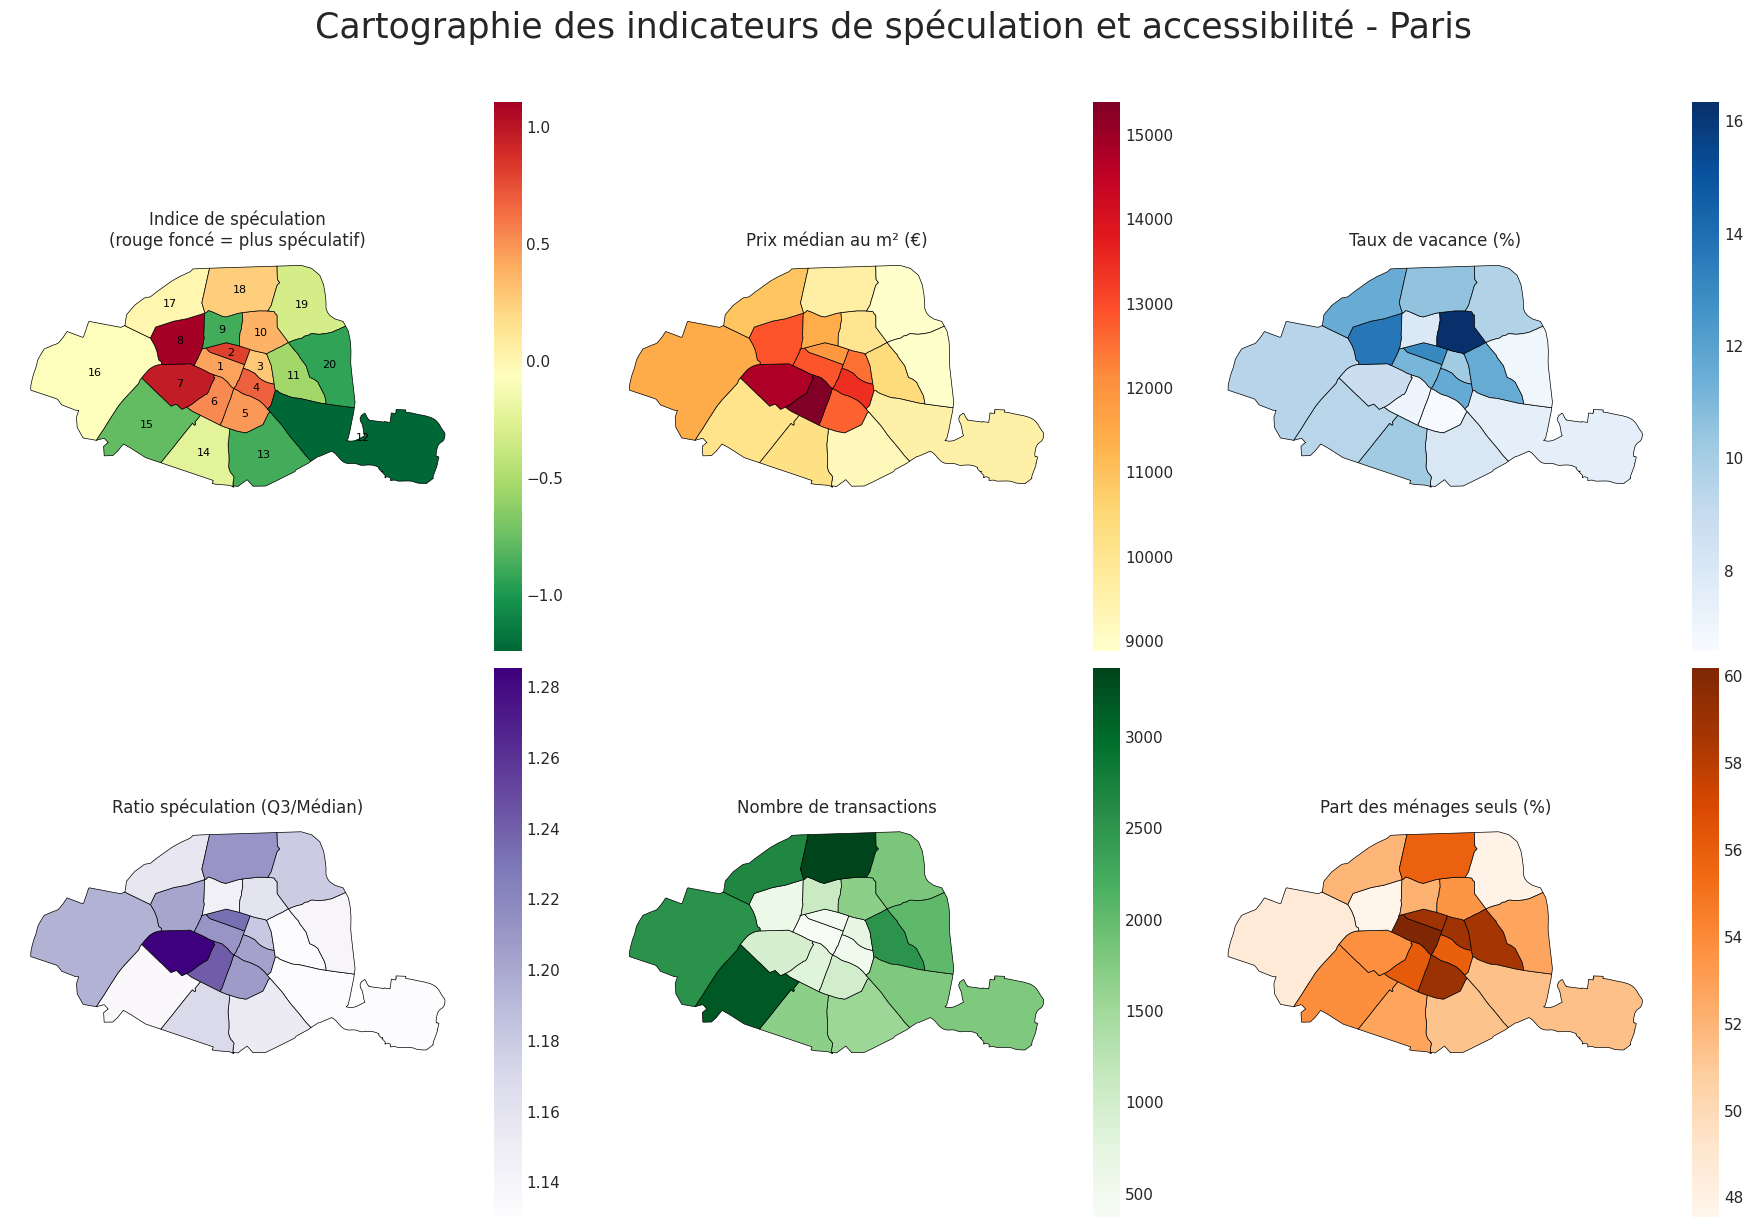

✓ Cartographie sauvegardée: /home/onyxia/work/Speculation-immobiliere-et-acces-au-logement/notebooks/ # Notebooks d'analyse (à exécuter dans l'ordre)/data/processed/cartographie_indicators.png


In [29]:
# ----------------------------------------------------
# 5. CARTOGRAPHIE DES INDICATEURS
# ----------------------------------------------------
print("\n" + "=" * 70)
print("5. CARTOGRAPHIE DES INDICATEURS")
print("=" * 70)

# Préparation des données géographiques
gdf = gdf.sort_values('arrondissement')

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Carte 1: Indice de spéculation
gdf.plot(column='indice_speculation', ax=axes[0, 0], legend=True,
         cmap='RdYlGn_r', edgecolor='black', linewidth=0.5)
axes[0, 0].set_title('Indice de spéculation\n(rouge foncé = plus spéculatif)', fontsize=12)
axes[0, 0].axis('off')

# Ajouter les numéros d'arrondissement
for idx, row in gdf.iterrows():
    axes[0, 0].annotate(text=int(row['arrondissement']), 
                       xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                       ha='center', va='center', fontsize=8, color='black')

# Carte 2: Prix médian au m²
gdf.plot(column='prix_m2_median', ax=axes[0, 1], legend=True,
         cmap='YlOrRd', edgecolor='black', linewidth=0.5)
axes[0, 1].set_title('Prix médian au m² (€)', fontsize=12)
axes[0, 1].axis('off')

# Carte 3: Taux de vacance
gdf.plot(column='taux_vacance', ax=axes[0, 2], legend=True,
         cmap='Blues', edgecolor='black', linewidth=0.5)
axes[0, 2].set_title('Taux de vacance (%)', fontsize=12)
axes[0, 2].axis('off')

# Carte 4: Ratio de spéculation (Q3/median)
gdf.plot(column='spec_ratio', ax=axes[1, 0], legend=True,
         cmap='Purples', edgecolor='black', linewidth=0.5)
axes[1, 0].set_title('Ratio spéculation (Q3/Médian)', fontsize=12)
axes[1, 0].axis('off')

# Carte 5: Nombre de transactions
gdf.plot(column='nb_transactions', ax=axes[1, 1], legend=True,
         cmap='Greens', edgecolor='black', linewidth=0.5)
axes[1, 1].set_title('Nombre de transactions', fontsize=12)
axes[1, 1].axis('off')

# Carte 6: Part des ménages seuls
gdf.plot(column='part_menages_seuls', ax=axes[1, 2], legend=True,
         cmap='Oranges', edgecolor='black', linewidth=0.5)
axes[1, 2].set_title('Part des ménages seuls (%)', fontsize=12)
axes[1, 2].axis('off')

plt.suptitle('Cartographie des indicateurs de spéculation et accessibilité - Paris', fontsize=25, y=1.02)
plt.tight_layout()
plt.savefig(PROC_DIR / "cartographie_indicators.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Cartographie sauvegardée: {PROC_DIR / 'cartographie_indicators.png'}")



6. SEGMENTATION DES ARRONDISSEMENTS

ANALYSE DES DIFFÉRENTES CONFIGURATIONS DE CLUSTERING:

Validation du nombre optimal de clusters:
  k=2 → score silhouette = 0.348
  k=3 → score silhouette = 0.381
  k=4 → score silhouette = 0.271

Choix de k=2 clusters

CARACTÉRISTIQUES DES CLUSTERS:
         prix_m2_median  taux_vacance  indice_speculation  part_menages_seuls  \
cluster                                                                         
0              12935.80         10.92                0.63               55.97   
1              10067.57          9.35               -0.51               52.46   

         nb_transactions  
cluster                   
0                 792.00  
1                2202.18  

INTERPRÉTATION DES CLUSTERS:

Cluster 0 - ARRONDISSEMENTS SPÉCULATIFS
  Arrondissements: [1, 2, 3, 4, 5, 6, 7, 8, 10]
  Taille: 9 arrondissements

Cluster 1 - ARRONDISSEMENTS POPULAIRES
  Arrondissements: [9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
  Taille: 11 arrondissements

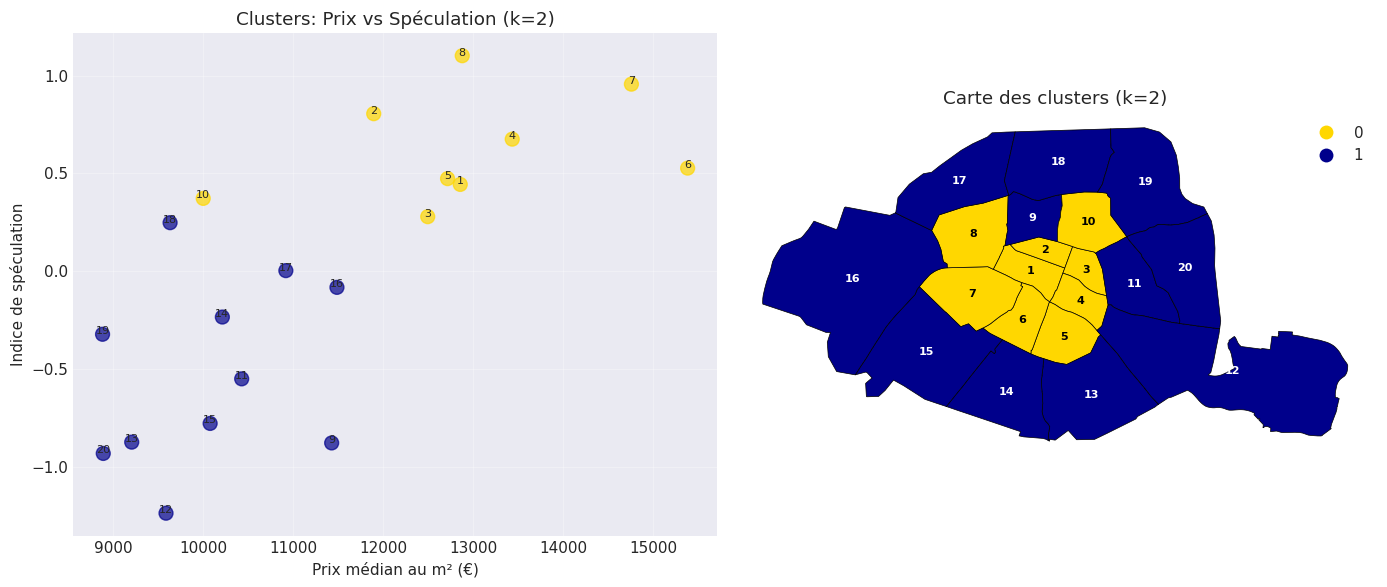


✓ Analyse de clustering sauvegardée


In [36]:
# ----------------------------------------------------
# 6. ANALYSE DE CLUSTERING
# ----------------------------------------------------
print("\n" + "=" * 70)
print("6. SEGMENTATION DES ARRONDISSEMENTS")
print("=" * 70)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("\nANALYSE DES DIFFÉRENTES CONFIGURATIONS DE CLUSTERING:")

# Variables pour le clustering
cluster_vars = ['prix_m2_median', 'taux_vacance', 'indice_speculation', 'part_menages_seuls']
X_cluster = df[cluster_vars].copy()

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Test de différents nombres de clusters
print("\nValidation du nombre optimal de clusters:")
for n_clusters in [2, 3, 4]:
    kmeans_test = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans_test.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"  k={n_clusters} → score silhouette = {score:.3f}")

# Choix de 2 clusters (car si on en prennait 3, il n'y avait que 2 arrondissements distants dans un cluster)
print("\nChoix de k=2 clusters")
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyse des clusters
print("\nCARACTÉRISTIQUES DES CLUSTERS:")
cluster_stats = df.groupby('cluster')[cluster_vars + ['nb_transactions']].mean().round(2)
print(cluster_stats)

# Interprétation basée sur les données
print("\nINTERPRÉTATION DES CLUSTERS:")
for cluster_num in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_num]
    arr_cluster = sorted(cluster_data['arrondissement'].tolist())
    
    # Description basée sur les caractéristiques
    prix_moyen = cluster_data['prix_m2_median'].mean()
    spec_moyen = cluster_data['indice_speculation'].mean()
    
    if prix_moyen > df['prix_m2_median'].median() and spec_moyen > 0:
        label = "ARRONDISSEMENTS SPÉCULATIFS"
    elif prix_moyen > df['prix_m2_median'].median():
        label = "ARRONDISSEMENTS HAUT DE GAMME"
    elif spec_moyen > 0:
        label = "ARRONDISSEMENTS À RISQUE SPÉCULATIF"
    else:
        label = "ARRONDISSEMENTS POPULAIRES"
    
    print(f"\nCluster {cluster_num} - {label}")
    print(f"  Arrondissements: {arr_cluster}")
    print(f"  Taille: {len(arr_cluster)} arrondissements")

# Visualisation des clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Création d'une liste de couleurs personnalisée
cluster_colors = ['gold', 'darkblue']

# Graphique 1: Clusters dans l'espace prix-spéculation
# Utilisation d'une liste de couleurs basée sur les clusters
colors = [cluster_colors[cluster] for cluster in df['cluster']]
scatter = axes[0].scatter(df['prix_m2_median'], df['indice_speculation'], 
                          c=colors, s=100, alpha=0.7)
axes[0].set_xlabel('Prix médian au m² (€)')
axes[0].set_ylabel('Indice de spéculation')
axes[0].set_title('Clusters: Prix vs Spéculation (k=2)')
axes[0].grid(True, alpha=0.3)

# Annoter les arrondissements
for idx, row in df.iterrows():
    axes[0].annotate(int(row['arrondissement']), 
                    (row['prix_m2_median'], row['indice_speculation']),
                    fontsize=8, ha='center')

# Graphique 2: Carte des clusters
gdf_cluster = gdf.merge(df[['arrondissement', 'cluster']], on='arrondissement')

# Création d'une colormap personnalisée pour la carte
from matplotlib.colors import ListedColormap
cmap_custom = ListedColormap(cluster_colors)

gdf_cluster.plot(column='cluster', ax=axes[1], categorical=True, 
                 legend=True, cmap=cmap_custom, edgecolor='black', linewidth=0.5)
axes[1].set_title('Carte des clusters (k=2)')
axes[1].axis('off')

# Ajouter les numéros avec couleur adaptée
for idx, row in gdf_cluster.iterrows():
    # Choisir la couleur du texte pour un bon contraste
    color = 'black' if row['cluster'] == 0 else 'white'  # Or → noir, Bleu foncé → blanc
    axes[1].annotate(text=int(row['arrondissement']), 
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    ha='center', va='center', fontsize=8, color=color,
                    fontweight='bold')

plt.tight_layout()
plt.savefig(PROC_DIR / "clustering_analysis.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Analyse de clustering sauvegardée")

## Segmentation des Arrondissements de Paris

### Validation du Nombre Optimal de Clusters

L'analyse de silhouette a testé 3 configurations différentes :
- **k=2** : Score de 0,348
- **k=3** : Score de 0,381 (meilleur)
- **k=4** : Score de 0,271 (plus faible)

**Interprétation** : Le choix s'est porté sur **k=2 clusters** malgré un score silhouette légèrement inférieur (0,348 vs 0,381 pour k=3), pour obtenir une segmentation plus équilibrée et interprétable (sinon 2 outliers avec une vacance moyenne de 15%: 8e et 10e).

### Caractéristiques des Deux Clusters

#### Cluster 0 - "Arrondissements Spéculatifs" (9 arrondissements)
- **Prix très élevés** : 12 936 €/m² (+29% par rapport au cluster 1)
- **Spéculation positive** : Indice de 0,63
- **Vacance modérée** : 10,92%
- **Forte proportion de ménages seuls** : 55,97%
- **Faible liquidité** : 792 transactions seulement

#### Cluster 1 - "Arrondissements Populaires" (11 arrondissements)
- **Prix abordables** : 10 068 €/m²
- **Spéculation négative** : Indice de -0,51
- **Vacance plus faible** : 9,35%
- **Proportion de ménages seuls moyenne** : 52,46%
- **Très forte liquidité** : 2 202 transactions (+178% par rapport au cluster 0)

### Répartition Géographique

#### Cluster 0 (Spéculatif) - 9 arrondissements
- **Arrondissements** : 1, 2, 3, 4, 5, 6, 7, 8, 10
- **Localisation** : Centre historique de Paris
- **Caractéristique spatiale** : Inclut le 10e arrondissement (pourtant périphérique), suggérant que la spéculation dépasse la simple localisation centrale

#### Cluster 1 (Populaire) - 11 arrondissements
- **Arrondissements** : 9, 11 à 20
- **Localisation** : Périphérie parisienne
- **Caractéristique spatiale** : Tous les arrondissements extérieurs sauf le 10e

### Analyse des Résultats

#### 1. Dichotomie claire entre centre et périphérie
La segmentation à 2 clusters révèle une **fracture nette** entre :
- **Paris central spéculatif** : cher, peu liquide, forte spéculation
- **Paris périphérique populaire** : abordable, très liquide, spéculation faible

#### 2. Anomalie du 10e arrondissement
Le **10e arrondissement** est classé avec le centre (cluster 0) alors qu'il est géographiquement périphérique. Cette inclusion confirme son statut **atypique** déjà observé dans les analyses précédentes (forte vacance, spéculation élevée malgré un prix modéré).

#### 3. Corrélations confirmées
Les clusters valident les corrélations observées précédemment :
- **Spéculation élevée** ↔ **Prix élevés** ↔ **Faible liquidité**
- **Spéculation faible** ↔ **Prix modérés** ↔ **Forte liquidité**

#### 4. Équilibre amélioré
La segmentation à 2 clusters crée des groupes **plus équilibrés** (9 vs 11 arrondissements) que la segmentation à 3 clusters (2 vs 11 vs 7).

### Implications pour l'Analyse

#### Pour les décideurs publics :
- **Deux politiques distinctes** nécessaires : une pour le centre spéculatif, une pour la périphérie populaire
- **Cibler le cluster 0** pour les mesures anti-spéculatives
- **Préserver le cluster 1** comme zone d'accessibilité au logement

#### Pour les investisseurs :
- **Cluster 0** : stratégie patrimoniale (valeur refuge, faible rotation)
- **Cluster 1** : stratégie locative (rendement, liquidité)

### Limites de l'Analyse

1. **Perte de nuance** : 2 clusters peuvent masquer des sous-groupes (ex: différence entre 6e et 10e arrondissements)
2. **Critère de choix** : préférer l'équilibre au score silhouette optimal (k=3 avait un meilleur score)
3. **Variables non considérées** : facteurs touristiques, commerciaux, ou de transports

### Conclusion

La segmentation à 2 clusters identifie **deux Paris immobiliers distincts** :
1. **Un Paris spéculatif et cher** (centre + 10e) où le marché est tendu et peu liquide
2. **Un Paris populaire et dynamique** (périphérie) où le marché est accessible et actif

Cette dichotomie simplifiée offre une **vision claire pour l'action publique** mais nécessite d'être complétée par des analyses plus fines au sein de chaque cluster.